In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Aqui fiz uma investigação preliminar dos dataframes. Algumas linhas que usei para fuçar a fundo eu apaguei, mas envolviam entender os valores com os quais estava lidando. Mais abaixo, heatmaps buscando as correlações entre as grandezas, para entender a melhor forma de lidar com dados faltantes ou incoerentes.

In [ ]:
df = pd.read_csv('treino.csv')

In [3]:
test = pd.read_csv('teste.csv')

In [14]:
test[test['util_linhas_inseguras']<=1]['util_linhas_inseguras'].mean()

0.3005300549104802

In [11]:
test

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
39995,0.000000,68,1,0.062858,10833.0,9,1,0,0,0.0
39996,0.061117,84,0,0.013598,8456.0,7,0,0,0,0.0
39997,0.817745,70,0,0.663056,6000.0,17,0,2,0,0.0
39998,0.106139,64,2,0.865438,5045.0,12,0,4,0,0.0


<AxesSubplot:>

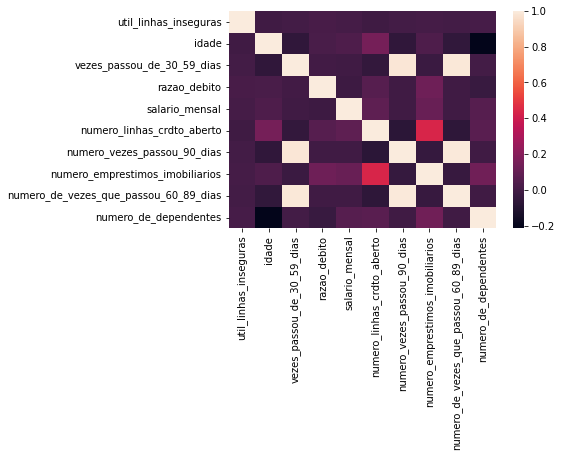

In [5]:
sns.heatmap(test.corr())

<AxesSubplot:>

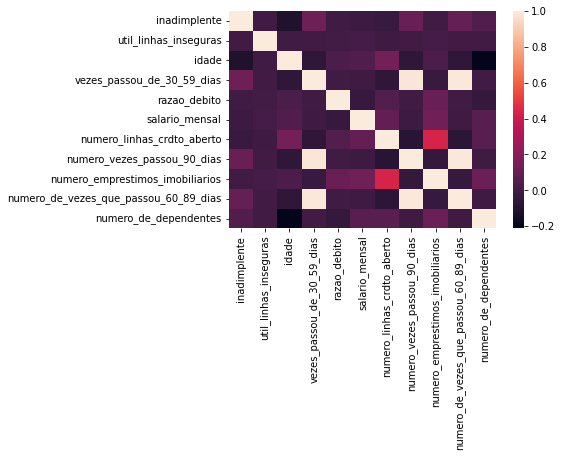

In [3]:
sns.heatmap(df.corr())

In [4]:
df['salario_mensal'].isnull().sum()

21763

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

Heatmap com nulls

<AxesSubplot:>

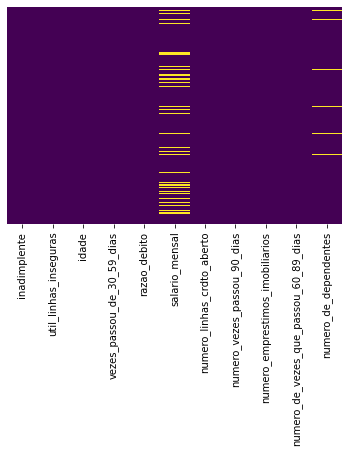

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
dfna = df.dropna()

In [8]:
drop_util = dfna[dfna['util_linhas_inseguras']>1].index

In [9]:
dfclean = dfna.drop(drop_util)

In [10]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(dfclean.drop('inadimplente', axis=1), dfclean['inadimplente'], test_size=0.30)

Acredito que o svm seja um bom classificador em casos como esse, e decidi fazer uma varredura. Notem os tempos para análise.... meu PC está velho, interrompi e testei apenas uma dupla de parâmetros. Retomei a análise posteriormente em outro PC mais rápido, vide o outro arquivo em anexo.

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# Talvez demore um pouco
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=15.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=15.6min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=16.0min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=16.0min


In [55]:
from sklearn.svm import SVC

In [56]:
model = SVC(C=0.1, gamma=0.0001)

In [58]:
model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.0001)

In [59]:
pred = model.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(confusion_matrix(y_test, pred))

[[24268     0]
 [ 1587     0]]


Aqui já é notável o quão eficaz foi para encontrar os verdadeiros positivos, mas péssimo nos verdadeiros negativos....

Percebi que seria válido ampliar as possibilidades de análise. Bora pro KNN:

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(dfclean.drop('inadimplente', axis=1))

StandardScaler()

In [21]:
df_normalizado = scaler.transform(dfclean.drop('inadimplente', axis=1))

In [22]:
df_param = pd.DataFrame(df_normalizado, columns=dfclean.columns[:-1])

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(df_param, dfclean['inadimplente'], test_size=0.1)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
X = df_param
y = dfclean['inadimplente']

In [46]:
import numpy as np
error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=Y_test))

Text(0, 0.5, 'Taxa de erro')

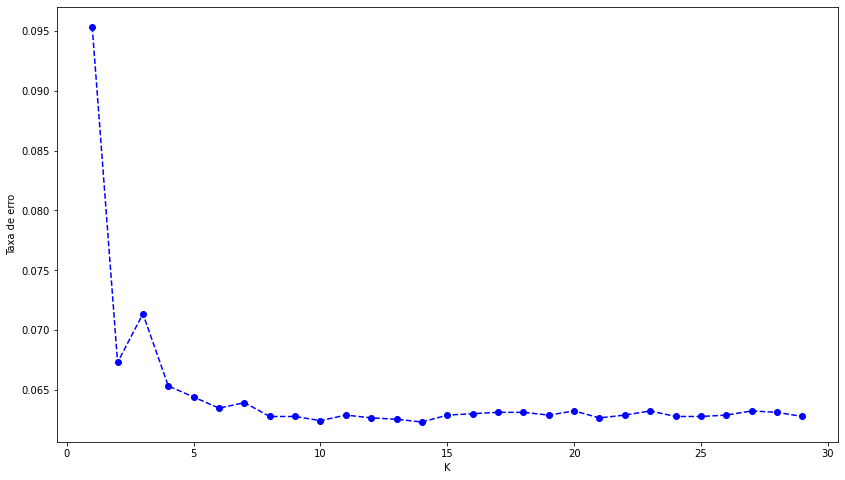

In [48]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 30), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Taxa de erro')

In [31]:
error_rate

[0.09251595436085863,
 0.06629278669502997,
 0.0690388706246374,
 0.06567395087990717,
 0.06648617288725585,
 0.06497776058789402,
 0.06490040611100367,
 0.06447495648810675,
 0.06466834268033263,
 0.06428157029588087,
 0.06435892477277122,
 0.0637787661960936,
 0.06374008895764842,
 0.0636240572423129,
 0.06389479791142913,
 0.06370141171920325,
 0.06346934828853219,
 0.06374008895764842,
 0.06346934828853219,
 0.06366273448075807,
 0.06354670276542256,
 0.06374008895764842,
 0.06354670276542256,
 0.06401082962676465,
 0.06385612067298395,
 0.06428157029588087,
 0.06397215238831948,
 0.0642428930574357,
 0.06397215238831948,
 0.0639334751498743,
 0.0639334751498743,
 0.0642428930574357,
 0.06401082962676465,
 0.06420421581899052,
 0.06420421581899052,
 0.06416553858054536,
 0.064088184103655,
 0.06416553858054536,
 0.0642428930574357]

In [49]:
error = pd.DataFrame(error_rate)

In [50]:
k = error.idxmin()[0] + 1

In [51]:
k

14

In [52]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

In [53]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8072
           1       0.64      0.04      0.08       547

    accuracy                           0.94      8619
   macro avg       0.79      0.52      0.52      8619
weighted avg       0.92      0.94      0.91      8619



In [54]:
print(confusion_matrix(Y_test, pred))

[[8059   13]
 [ 524   23]]


KNN já ficou mais interessante! No outro arquivo mostro o report do SVM, e o procedimento das trees e forests. Por pouco não considerei a análise KNN. Sinceramente, se eu tivesse poder computacional disponível e não tivesse me preocupado em não demorar para enviar a análise, teria considerado KNN, randomforest e SVM simultaneamente, fazendo com que a previsão final de cada caso fosse o arredondamento da média das previsões dos três métodos. Porém, dependendo dos meios e métodos de um trabalho, vale escolher por vezes não o mais robusto, mas sim o mais simples e eficaz, e assim randomforest ganhou. Além de que mesclar métodos muito diferentes pode causar desvios e erros mais imprevisíveis na análise.